# Handling Missing Values

## **Técnicas:**

1. Omisión:
    - Remover filas con `.dropna(axis=0)`

    - Remover columnas con `.dropna(axis=1)`

2. Imputación
    - Rellenar con ceros --> `SimpleImputer(strategy='constant', fill_value=0)`

    - Imputar media --> `SimpleImputer(strategy='mean')`

    - Imputar mediana --> `SimpleImputer(strategy='median')`

    - Imputar moda --> `SimpleImputer(strategy='most_frequent')`

    - Imputación iterativa --> `IterativeImputer()`

    - Imputación con KNN --> `KNNImputer()`

    - Imputación con Random Forest's --> `MissForest()`

## **¿Por qué es importante imputar u omitir los valores nulos?**

- Hacer una correcta imputación de nulos, reduce la probabilidad de introducir sesgos a los modelos en la mayoría de los casos.

- Muchos algoritmos de ML necesitan que los datos estén "completos", es decir, que no contengan nulos.

## **Efectos de la imputación:**

Los efectos de la imputación de nulos, puede variar según la **cantidad de valores faltantes**, la **varianza original** de los datos, la **precencia de outliers** y la **dirección** y **magnitud** del **skew** en los datos.

- Omitir valores nulos --> Puede remover mucha información si no se quitan con cuidado.

- Imputar con ceros --> Puede resultar en un sesgo hacia abajo (o hacia el cero).

- Imputar con la media --> La media puede verse afectada por outliers.

- Imputar con la mediana --> Es mejor opción en caso de outliers.

- Imputación iterativa o con la moda --> Solo es cuestión de probarlas.

> Solo como nota: `df.select_dtypes(include=[np.number])` selecciona el subconjunto del df con columnas numéricas. Si pasas `object` en lugar de `np.number`, te regresa el subconjunto del df con columnas con `strings`.

## **Pregunta:**

¿Cuáles son los efectos de los valores faltantes en el contexto de Machine Learning? (Selecciona la respuesta correcta)

- Los valores faltantes no son un problema, ya que los algoritmos de `sklearn` pueden entrenarse con ellos.

- Remover las observaciones o características con valores faltantes, por lo general es una buena idea.

- Los valores faltantes tienden a introducir sesgo que puede hacer que lleguemos a resultados incorrectos, es por eso que no pueden ser ignorados.

- Rellenar con ceros los valores faltantes pueden generar un sesgo hacia arriba.

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import SimpleImputer, IterativeImputer, KNNImputer

In [8]:
np.random.seed(11)

Cargamos datos sobre universidades al rededor del mundo.

In [9]:
college_data = pd.read_csv('../data/College Data.csv')

In [10]:
college_data.head()

,College ID,Country,Total Students,Male,Female,CGPA,Annual Family Income,Branch,Sports,Research Papers Published,Placement Rate,Faculty Count
0,College 52,UK,27002,2593,11644,10.000000,3574250,Physics,Swimming,39,100.00,655
1,College 93,Switzerland,11913,9392,2521,6.951278,762556,Chemical Engineering,Athletics,31,68.84,256
2,College 15,Japan,15644,5475,4388,9.327922,1795845,Business Administration,Volleyball,37,91.99,555
3,College 72,Singapore,13239,7363,5876,8.681112,1222223,Physics,Tennis,48,97.98,455
4,College 61,Canada,10236,13339,-3103,8.560567,1921133,Biotechnology,Athletics,34,83.56,310


Checamos la distribución original del `CGPA`.

Media: 8.71
Media: 1.05


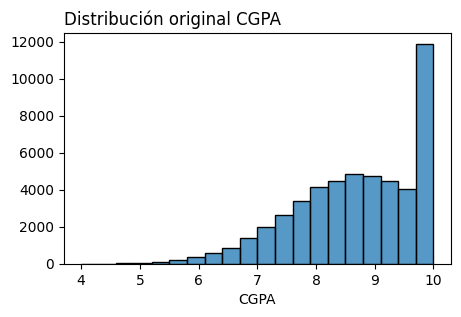

In [11]:
media = college_data['CGPA'].mean()
std = college_data['CGPA'].std()

print(f"Media: {media:,.2f}")
print(f"Media: {std:,.2f}")

plt.subplots(figsize=(5, 3))
sns.histplot(data=college_data, x='CGPA', bins=20)
plt.title("Distribución original CGPA", loc='left')
plt.ylabel('')
plt.show()

Ahora, vamos a introducir un 50% de valores nulos de manera aleatoria al dataset.

In [12]:
missing_vals_indices = np.random.randint(
    0, college_data.shape[0], size=int(college_data.shape[0] * 0.5))

college_data_w_missing = college_data.copy()

college_data_w_missing.loc[missing_vals_indices, 'CGPA'] = np.nan

college_data_w_missing.isna().sum()

College ID                       0
Country                          0
Total Students                   0
Male                             0
Female                           0
CGPA                         19632
Annual Family Income             0
Branch                           0
Sports                           0
Research Papers Published        0
Placement Rate                   0
Faculty Count                    0
dtype: int64

Checamos la distribución de los datos con los valores nulos que introdujimos aleatoriamente.

Media: 8.70
Media: 1.06


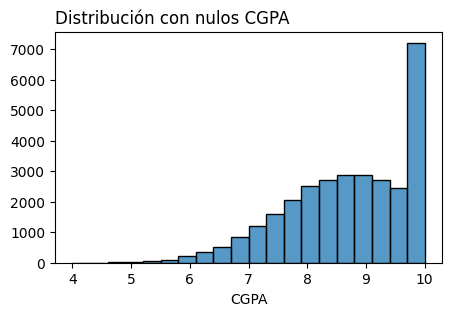

In [13]:
media = college_data_w_missing['CGPA'].mean()
std = college_data_w_missing['CGPA'].std()

print(f"Media: {media:,.2f}")
print(f"Media: {std:,.2f}")

plt.subplots(figsize=(5, 3))
sns.histplot(data=college_data_w_missing, x='CGPA', bins=20)
plt.title("Distribución con nulos CGPA", loc='left')
plt.ylabel('')
plt.show()

Podemos ver que si los quitamos aleatoriamente, no cambia mucho la distribución de los datos. Vamos a ver qué pasa si imputamos con ceros. Pero primero vamos a definir una función para ver la distribución de los datos con distintas estrategias de imputación.

## `SimpleImputer`

In [14]:
def check_distribution(df, strategy, **kwargs):
    imputer = SimpleImputer(strategy=strategy, **kwargs)
    df = df.copy()

    imp_values = imputer.fit_transform(df)

    df_imputed = pd.DataFrame(imp_values, columns=df.columns)

    media = df_imputed['CGPA'].mean()
    std = df_imputed['CGPA'].std()

    print(f"Media: {media:,.2f}")
    print(f"Std: {std:,.2f}")

    plt.subplots(figsize=(5, 3))
    sns.histplot(data=df_imputed, x='CGPA', bins=20)
    plt.title(f"Distribución CGPA con `strategy={strategy}`", loc='left')
    plt.ylabel('')
    plt.show()

Media: 5.29
Std: 4.33


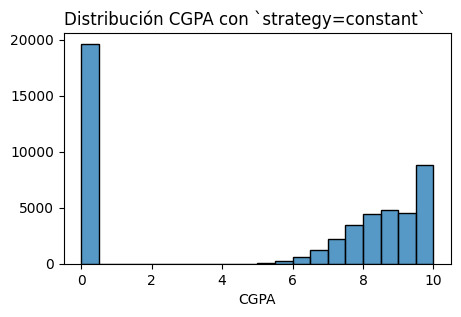

Media: 8.70
Std: 0.82


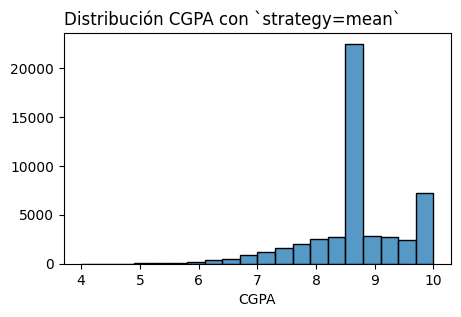

Media: 8.74
Std: 0.83


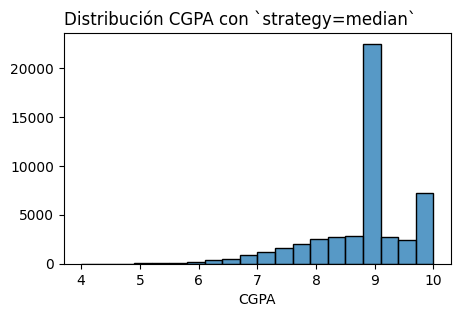

Media: 9.21
Std: 1.04


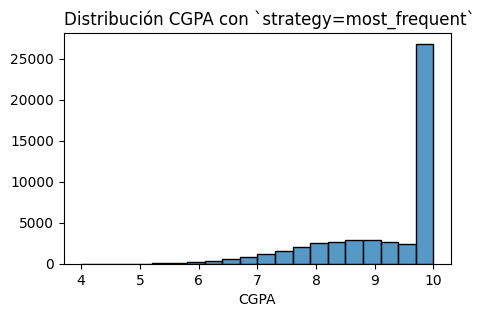

In [15]:
check_distribution(college_data_w_missing[['CGPA']], 'constant', fill_value=0)
check_distribution(college_data_w_missing[['CGPA']], 'mean')
check_distribution(college_data_w_missing[['CGPA']], 'median')
check_distribution(college_data_w_missing[['CGPA']], 'most_frequent')

Podemos ver como con las técnicas "simples" de imputación la distribución en los datos cambia. Vamos a probar ahora con el `IterativeImputer`.

## `IterativeImputer`

In [16]:
def check_distribution_iterative_imp(df):
    imputer = IterativeImputer(max_iter=10, random_state=79)
    df = df.copy()

    imp_values = imputer.fit_transform(df)

    df_imputed = pd.DataFrame(imp_values, columns=df.columns)

    media = df_imputed['CGPA'].mean()
    std = df_imputed['CGPA'].std()

    print(f"Media: {media:,.2f}")
    print(f"Std: {std:,.2f}")

    plt.subplots(figsize=(5, 3))
    sns.histplot(data=df_imputed, x='CGPA', bins=20)
    plt.title(f"Distribución CGPA con `IterativeImputer`", loc='left')
    plt.ylabel('')
    plt.show()

Media: 8.70
Std: 0.82


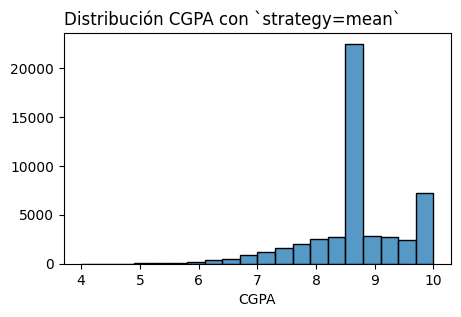

Media: 8.70
Std: 0.82


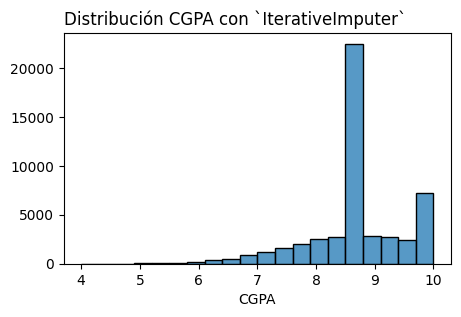

In [17]:
check_distribution(college_data_w_missing[['CGPA']], 'mean')
check_distribution_iterative_imp(college_data_w_missing[['CGPA']])

Nos da casi lo mismo que con la media. Entonces, ¿Existe alguna manera en la que imputemos datos sin modificar la distribución original de los datos?.

# `KNNImputer`

In [18]:
def check_distribution_knn_imp(df):
    imputer = KNNImputer(n_neighbors=5)
    df = df.copy()

    imp_values = imputer.fit_transform(df)

    df_imputed = pd.DataFrame(imp_values, columns=df.columns)

    media = df_imputed['CGPA'].mean()
    std = df_imputed['CGPA'].std()

    print(f"Media: {media:,.2f}")
    print(f"Std: {std:,.2f}")

    plt.subplots(figsize=(5, 3))
    sns.histplot(data=df_imputed, x='CGPA', bins=20)
    plt.title(f"Distribución CGPA con `KNNImputer`", loc='left')
    plt.ylabel('')
    plt.show()

In [19]:
# Checamos qué variables pueden estar correlacionadas con el 'CGPA'
college_data_w_missing.select_dtypes(include=[np.number]).corr()['CGPA'].sort_values()

Total Students              -0.010662
Faculty Count               -0.004330
Female                      -0.002104
Male                         0.001037
Research Papers Published    0.005032
Placement Rate               0.006593
Annual Family Income         0.562876
CGPA                         1.000000
Name: CGPA, dtype: float64

Media: 8.70
Std: 0.94


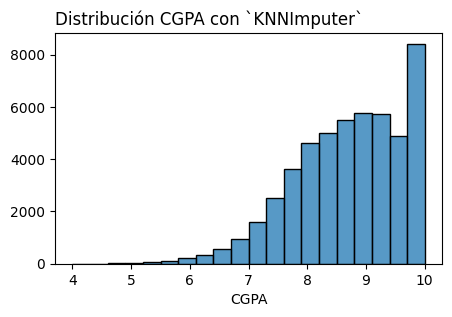

In [20]:
check_distribution_knn_imp(college_data_w_missing[['CGPA', 'Annual Family Income']])

Podemos observar como el KNNImputer hace un mejor trabajo, comparado con los métodos anteriores, si le compartimos variables correlacionadas con la variable que queremos imputar. Sin embargo este método es caro computacionalmente y tarda un poco. Igual vale la pena notar que la media se mantuvo, mientras que la desviación estándar se redujó 0.11 puntos.

# Imputación `MICE`

La imputación MICE (Multiple Imputation by Chained Equiation) es una técnica de imputación avanzada que usa múltiples iteraciones de un modelo de Machine Learning para predecir los valores faltantes a partir de otras variables en los datos como predictores de la variable a imputar.

Recursos:

- https://scikit-learn.org/stable/auto_examples/impute/plot_iterative_imputer_variants_comparison.html#sphx-glr-auto-examples-impute-plot-iterative-imputer-variants-comparison-py

- https://www.machinelearningplus.com/machine-learning/mice-imputation/

In [21]:
from sklearn.ensemble import RandomForestRegressor

In [22]:
def check_distribution_iterative_imp(df, estimator):
    imputer = IterativeImputer(estimator, max_iter=10, random_state=79)
    df = df.copy()

    imp_values = imputer.fit_transform(df)

    df_imputed = pd.DataFrame(imp_values, columns=df.columns)

    media = df_imputed['CGPA'].mean()
    std = df_imputed['CGPA'].std()

    print(f"Media: {media:,.2f}")
    print(f"Std: {std:,.2f}")

    plt.subplots(figsize=(5, 3))
    sns.histplot(data=df_imputed, x='CGPA', bins=20)
    plt.title(f"Distribución CGPA con `IterativeImputer`", loc='left')
    plt.ylabel('')
    plt.show()

Media: 8.70
Std: 0.98


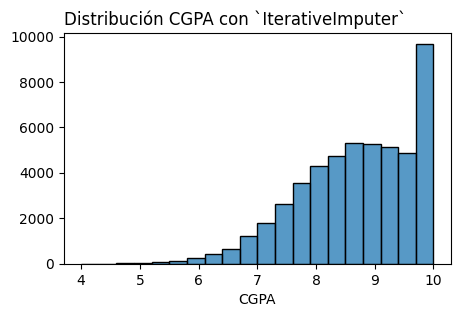

In [23]:
# Esto es similar a hacer el MissForest
# tiene un ligero mejor performance que el KNN y es mucho más rápido
# Se pueden tunear los hiperparámetros para obtener mejores resultados 
rf = RandomForestRegressor()

check_distribution_iterative_imp(college_data_w_missing[['CGPA', 'Annual Family Income']], rf)

Media: 8.70
Std: 0.93


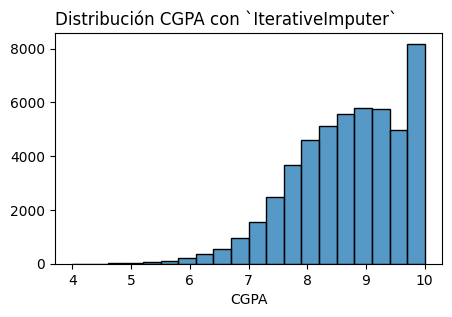

In [24]:
check_distribution_iterative_imp(college_data_w_missing[['CGPA', 'Annual Family Income', 'Total Students']], rf)

Media: 8.70
Std: 0.90


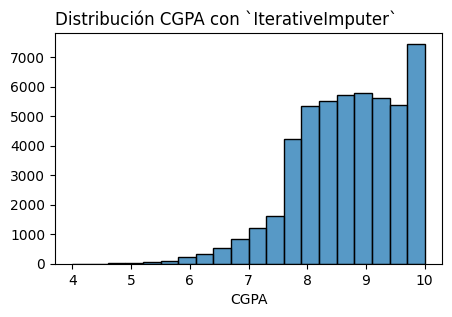

In [25]:
# El estimador por defecto es el BayesianRidge() de scikit-learn
check_distribution_iterative_imp(college_data_w_missing[['CGPA', 'Annual Family Income']], None)